## Начало лабораторной

Выгрузка данных из csv фйла в датафрейм

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(".//static//csv//Yamana_Gold_Inc._AUY.csv")
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


# Диаграмма №1 - Гистограмма с дополнительной осью
## Диаграмма числа продаж акций за год за весь период времени: Данная диаграмма отображает зависимость обьёма продаж от окончательных цен акций за каждый период

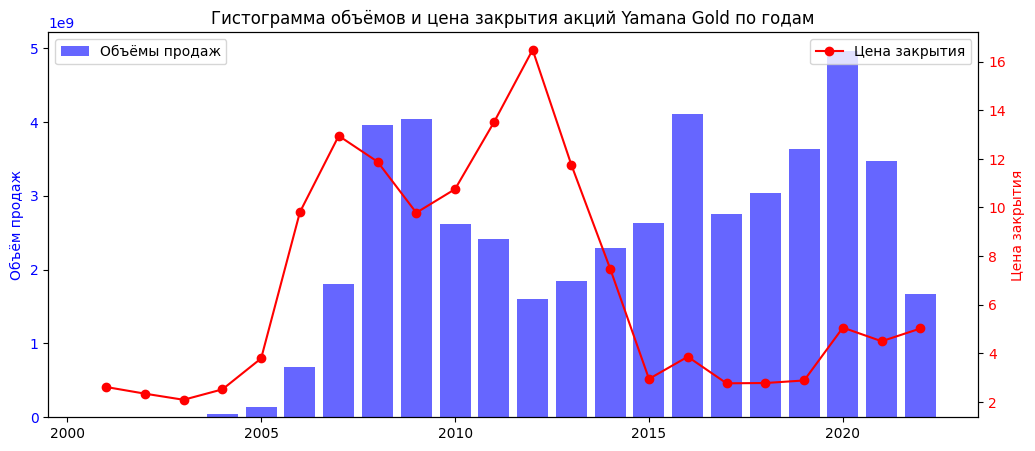

In [2]:
# Преобразуем колонку 'Date' в формат datetime
df['Date'] = pd.to_datetime(df['Date'])

# Добавляем колонку с годом
df['Year'] = df['Date'].dt.year

# Группируем данные по годам и суммируем объёмы и цены закрытия
annual_data = df.groupby('Year').agg({'Volume': 'sum', 'Close': 'mean'}).reset_index()

# Создаём график
fig, ax1 = plt.subplots(figsize=(12, 5))

# Строим гистограмму объёмов
ax1.bar(annual_data['Year'], annual_data['Volume'], color='b', alpha=0.6, label='Объёмы продаж')
ax1.set_ylabel('Объём продаж', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Создаём вторую ось для отображения цены закрытия
ax2 = ax1.twinx()
ax2.plot(annual_data['Year'], annual_data['Close'], color='r', marker='o', label='Цена закрытия')
ax2.set_ylabel('Цена закрытия', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Добавляем заголовок и легенды
plt.title('Гистограмма объёмов и цена закрытия акций Yamana Gold по годам')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Отображаем график
plt.show()

# Диаграмма №2 - Круговая диаграмма
## Диаграмма среднего объёма продаж акций за год за весь период времени: Данная диаграмма отображает соотношение между годами среднего объёма продаж

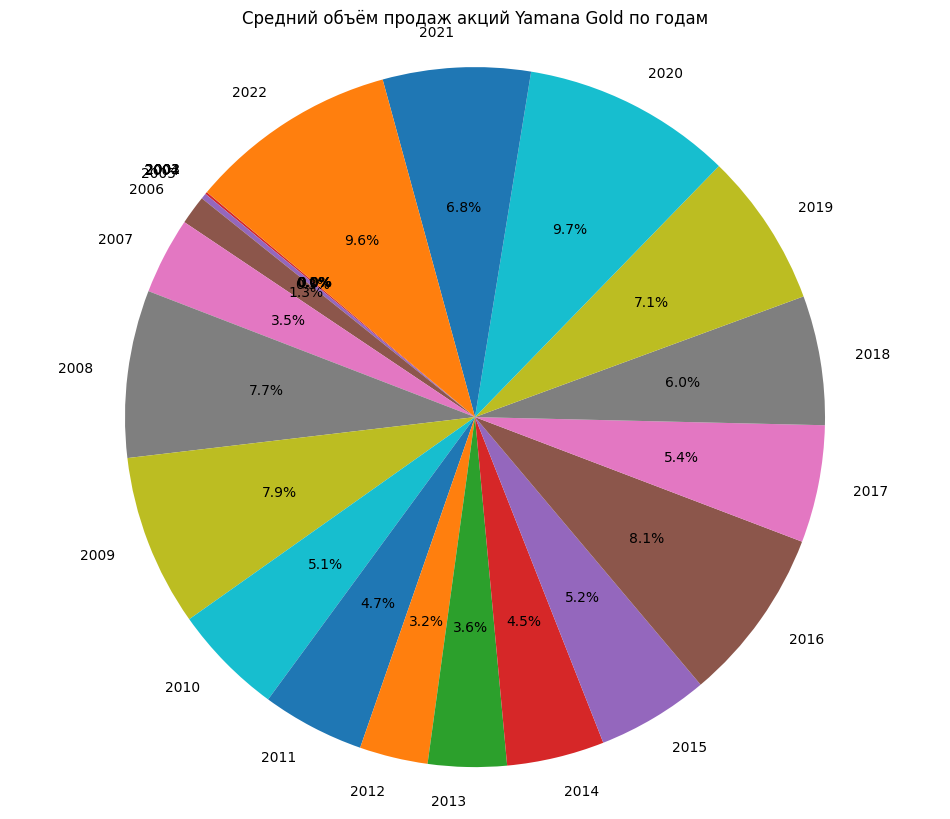

In [3]:
# Убедитесь, что столбец 'Date' распознаётся как дата
df['Date'] = pd.to_datetime(df['Date'])

# Группировка данных по годам и расчёт среднего объёма
annual_data = df.groupby('Year')['Volume'].mean()

# Построение круговой диаграммы
plt.figure(figsize=(12, 10))
plt.pie(annual_data, labels=annual_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Средний объём продаж акций Yamana Gold по годам')
plt.axis('equal')  # Чтобы круговая диаграмма была кругом
plt.show()

# Диаграмма №3 - Гистограмма с скользящей шкалой

## График динамики объемов торгов акций Yamana Gold Inc: Данный график отображает динамику объёмов торгов на акции компании, что помогает сделать вывод о том, когда у компании успешные времена, а когда нет. Например по этой диаграмме можно понять, что у компании в 2022 году был хороший объём пролаж

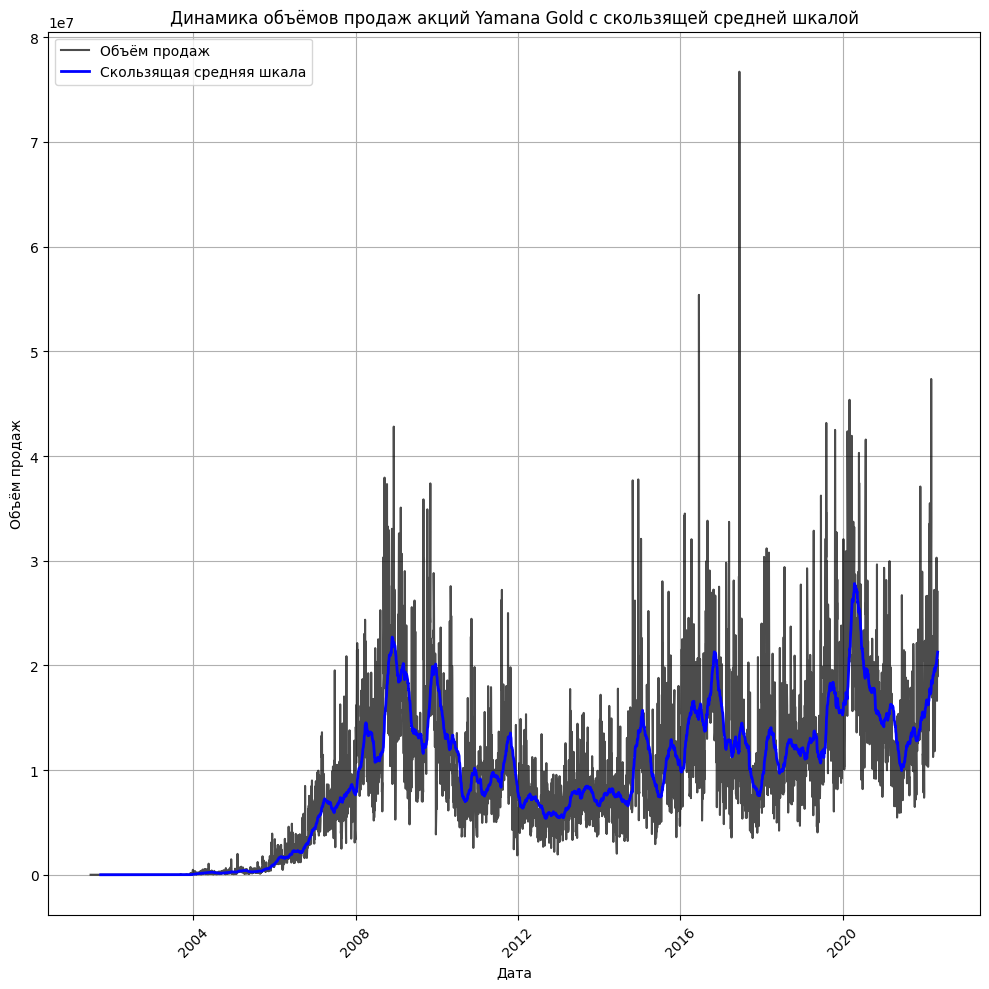

In [4]:
# Преобразуем колонку 'Date' в формат datetime
df['Date'] = pd.to_datetime(df['Date'])

# Устанавливаем дату в качестве индекса
df.set_index('Date', inplace=True)

# Рассчитываем годовую скользящую среднюю для объёмов продаж
df['Volume_SMA'] = df['Volume'].rolling(window=60).mean()

# Создаём график объёмов продаж
plt.figure(figsize=(10, 10))
plt.plot(df.index, df['Volume'], label='Объём продаж', color='black', alpha=0.7)
plt.plot(df.index, df['Volume_SMA'], label='Скользящая средняя шкала', color='blue', linewidth=2)

# Настройки графика
plt.title('Динамика объёмов продаж акций Yamana Gold с скользящей средней шкалой')
plt.xlabel('Дата')
plt.ylabel('Объём продаж')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Поворачиваем метки по оси X
plt.tight_layout()  # Подгоняем график

# Показать график
plt.show()